# Assignment 2A - Part 3: Implementing the classifier

by John Lindblad and Olle Lindgren

## Importing packages and data

In [1]:
# standard tools and text preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from collections import Counter
from statistics import mode
from pprint import PrettyPrinter
# model evaluation and tuning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
# classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [76]:
# importing the data
training_data = pd.read_csv('a2a_train_final.tsv', sep='\t', header=None)
# creating a list of lists with annotations
ann = []
for k in training_data[0]:
    ann.append(k.split('/'))
Y=[]
for i in range(len(ann)):
    l = ann[i]
    try:
        m = mode(l)
        c = l.count(m)
        if m==-1:
            Y.append(None)
        elif c/len(l) < 1:
            Y.append(None)
        #elif c<2:
        #    Y.append(None)
        else:
            Y.append(mode(l))
    except:
        Y.append(None)
X = training_data[1]
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [77]:
lengths = []
for k in ann:
    lengths.append(len(k))
no_comments = len(training_data)
max_annots = max(lengths)
min_annots = min(lengths)

print(f'Among the {no_comments} in the full training dataset, the number of annotations of each comment was between {min_annots} and {max_annots}')

Among the 13517 in the full training dataset, the number of annotations of each comment was between 1 and 15


In [78]:
z = zip(X,Y)
X_ = []
Y_ = []
for row in z:
    x  = row[0]
    y= row[1]
    if (y == "1") or (y == "0"):
        X_.append(x)
        Y_.append(y)
assert len(X_) == len(Y_)
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.3, random_state=0)

In [79]:
'''Size of training data sample for different thresholds of agreement:
0: 7966
0.7: 7742
0.9: 7704
0.95: 7703
1: 7703
'''
len(X_train)

7703

In [64]:
''' NOTE:
This solution means that we loses a lot of data due to the fact that the following document instances are lost:
* those where -1 was most common
* those where there was a tie

Further, I have not yet implemented any agreement test/assessment
''';

In [65]:
''' RANDOM STUFF THAT MAY BE USEFUL

indices = [i for i, x in enumerate(Y) if x == None]

def unique(list1): 
    x = np.array(list1) 
    print(np.unique(x))

# selecting the most common as Y
Y=[]
for c in ann:
    k = Counter(k).keys()
    v = Counter(k).values()
    i = v.index(max(v))
    Y.append(k[i])
''';

## Comparing a couple of potential classifiers

In [80]:
def train_document_classifier(X,Y, classifier):
    pipeline = make_pipeline( TfidfVectorizer(), classifier)
    pipeline.fit(X,Y)
    return pipeline

def compare_classifiers(clf_list, X_train, Y_train, X_test, Y_test):
    for c in clf_list:
        m_name = type(c).__name__
        clf =  train_document_classifier(X_train, Y_train, c)
        accuracy = accuracy_score(Y_test, clf.predict(X_test))
        print(f'The accuracy of {m_name} on the test set is: {accuracy}')
        plot_confusion_matrix(clf, X_test, Y_test, normalize='all')
        plt.title(m_name)
    return m_name, accuracy

The accuracy of SVC on the test set is: 0.8038656527249683
The accuracy of DecisionTreeClassifier on the test set is: 0.673637515842839
The accuracy of RandomForestClassifier on the test set is: 0.7633079847908745
The accuracy of Perceptron on the test set is: 0.7604562737642585
The accuracy of DummyClassifier on the test set is: 0.5202788339670469
The accuracy of LogisticRegression on the test set is: 0.7991128010139417


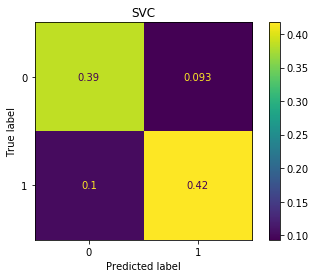

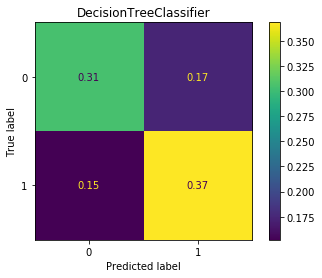

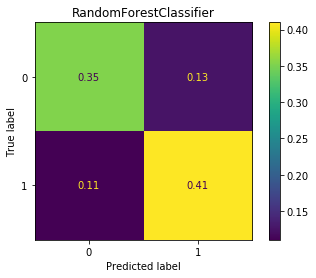

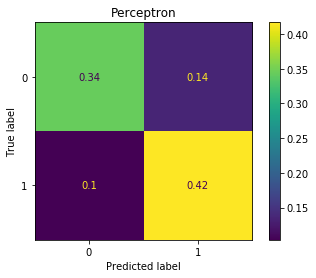

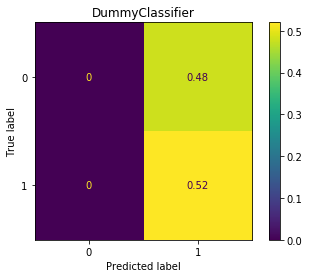

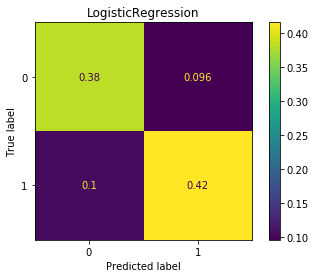

In [68]:
# comparing a couple of classifiers
clf_list = [SVC(random_state=0, kernel='linear'),
            DecisionTreeClassifier(random_state=0),
            RandomForestClassifier(n_jobs=-1, random_state=0),
            Perceptron(n_jobs=-1, random_state=0),
            #MLPClassifier(random_state=0),
            DummyClassifier(strategy='most_frequent'),
            LogisticRegression(random_state=0, n_jobs=-1)
           ]

compare_classifiers(clf_list, X_train, Y_train, X_test, Y_test);

## Going further with the selected classifier

Below, I will try to tune the hyperparameters for the selected model that scored best above.

In [69]:
model = SVC(random_state=0, kernel='linear')
m_name = type(model).__name__
clf =  train_document_classifier(X_train, Y_train, model)
accuracy = accuracy_score(Y_test, clf.predict(X_test))
print(f'The accuracy of {m_name} on the test set is: {accuracy}')

parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
             'C':[1,10]}
GridSearchCV(clf, param_grid=parameters)

The accuracy of SVC on the test set is: 0.8038656527249683


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

## Testing on the final test set

In [70]:
test_final = pd.read_csv('a2a_test_final.tsv', sep='\t', header=None)
X_final = test_final[1]
Y_final = []
for t in test_final[0]:
    Y_final.append(str(t))
assert len(Y_final) == len(X_final)

In [71]:
#res = clf.predict(X_final)
#print(res)
#print(Y_final)

In [72]:
accuracy = accuracy_score(Y_final, clf.predict(X_final))
print(f'The accuracy of the Linear SVC on the final test set is: {accuracy}')

The accuracy of the Linear SVC on the final test set is: 0.7844827586206896
